<a href="https://colab.research.google.com/github/dueuwh/Personal-Projects/blob/main/2022_1%ED%95%99%EA%B8%B0_%EC%BA%A1%EC%8A%A4%ED%86%A4/Merge_for_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_2020_to_2021_v2 = pd.read_csv('/content/drive/MyDrive/발전예측/2ndSpline/df_2020_to_2021_v2.csv')
df_2020_to_2021_v2.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df_2020_to_2021_v1 = pd.read_csv('/content/drive/MyDrive/발전예측/2ndSpline/df_2020_to_2021_rain_pulse.csv')

In [ ]:
df_2020_to_2021_v1.drop(['Unnamed: 0', 'sunlight'], axis = 1, inplace = True)
df_2020_to_2021_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210528 entries, 0 to 210527
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   temperature      210528 non-null  float64
 1   precipitation    210528 non-null  float64
 2   wind_speed       210528 non-null  float64
 3   humidity         210528 non-null  float64
 4   insolation       210528 non-null  float64
 5   snow_load        210528 non-null  float64
 6   datetime         210528 non-null  object 
 7   Day sin          210528 non-null  float64
 8   Day cos          210528 non-null  float64
 9   Year sin         210528 non-null  float64
 10  Year cos         210528 non-null  float64
 11  rain_flag_pulse  210528 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 19.3+ MB


In [ ]:
df_2020_to_2021_v2 = pd.concat([df_2020_to_2021_v1, df_2020_to_2021_v2], axis = 1)
df_2020_to_2021_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210528 entries, 0 to 210527
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   temperature      210528 non-null  float64
 1   precipitation    210528 non-null  float64
 2   wind_speed       210528 non-null  float64
 3   humidity         210528 non-null  float64
 4   insolation       210528 non-null  float64
 5   snow_load        210528 non-null  float64
 6   datetime         210528 non-null  object 
 7   Day sin          210528 non-null  float64
 8   Day cos          210528 non-null  float64
 9   Year sin         210528 non-null  float64
 10  Year cos         210528 non-null  float64
 11  rain_flag_pulse  210528 non-null  int64  
 12  date             210528 non-null  object 
 13  sunlight         210528 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 22.5+ MB


In [ ]:
df_2020_to_2021_v2.to_csv('/content/drive/MyDrive/발전예측/2ndSpline/df_2020_to_2021_v2_rain_flag_pulse')

In [ ]:
df_2020_to_2021.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df_2020_to_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210528 entries, 0 to 210527
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      210528 non-null  object 
 1   sunlight  210528 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
rain_flag = df_2020_to_2021['precipitation']>0

KeyError: ignored

In [ ]:
rain_flag.shape

NameError: ignored

In [ ]:
df_temp = []
for i in range(rain_flag.shape[0]):
  if rain_flag[i]:
    df_temp.append([1])
  else:
    df_temp.append([0])

df_temp = pd.DataFrame(df_temp)
df_temp.columns = ['rain_flag_pulse']
df_temp.head()

,rain_flag_pulse
0,0
1,0
2,0
3,0
4,0


(1500.0, 2000.0)

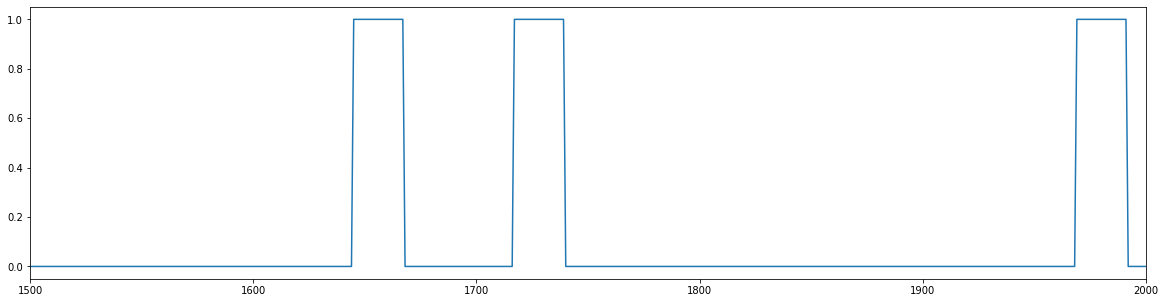

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(df_temp)
plt.xlim(1500, 2000,)

In [ ]:
df_2020_to_2021 = pd.concat([df_2020_to_2021, df_temp], axis = 1)
df_2020_to_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210528 entries, 0 to 210527
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   temperature      210528 non-null  float64
 1   precipitation    210528 non-null  float64
 2   wind_speed       210528 non-null  float64
 3   humidity         210528 non-null  float64
 4   insolation       210528 non-null  float64
 5   snow_load        210528 non-null  float64
 6   sunlight         210528 non-null  float64
 7   datetime         210528 non-null  object 
 8   Day sin          210528 non-null  float64
 9   Day cos          210528 non-null  float64
 10  Year sin         210528 non-null  float64
 11  Year cos         210528 non-null  float64
 12  rain_flag_pulse  210528 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 20.9+ MB


In [ ]:
df_2020_to_2021.to_csv('df_2020_to_2021_rain_pulse.csv')

In [ ]:
df_2020 = pd.read_csv('/content/drive/MyDrive/발전예측/2ndSpline/df_2020_lstm.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/발전예측/2ndSpline/df_2021_lstm.csv')

In [ ]:
df_2020_to_2021 = pd.concat([df_2020, df_2021], axis = 0)
df_2020_to_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210528 entries, 0 to 105119
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     210528 non-null  int64  
 1   temperature    210528 non-null  float64
 2   precipitation  210528 non-null  float64
 3   wind_speed     210528 non-null  float64
 4   humidity       210528 non-null  float64
 5   insolation     210528 non-null  float64
 6   snow_load      210528 non-null  float64
 7   sunlight       210528 non-null  float64
 8   datetime       210528 non-null  object 
 9   Day sin        210528 non-null  float64
 10  Day cos        210528 non-null  float64
 11  Year sin       210528 non-null  float64
 12  Year cos       210528 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 22.5+ MB


In [ ]:
df_2020_to_2021.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_2020_to_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210528 entries, 0 to 105119
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   temperature    210528 non-null  float64
 1   precipitation  210528 non-null  float64
 2   wind_speed     210528 non-null  float64
 3   humidity       210528 non-null  float64
 4   insolation     210528 non-null  float64
 5   snow_load      210528 non-null  float64
 6   sunlight       210528 non-null  float64
 7   datetime       210528 non-null  object 
 8   Day sin        210528 non-null  float64
 9   Day cos        210528 non-null  float64
 10  Year sin       210528 non-null  float64
 11  Year cos       210528 non-null  float64
dtypes: float64(11), object(1)
memory usage: 20.9+ MB


In [ ]:
df_2020_to_2021.to_csv('df_2020_to_2021.csv')

In [ ]:
fcst_2020 = pd.read_csv('/content/drive/MyDrive/발전예측/2ndSpline/2020_fcst_5m_2nd_spline.csv')
sun_2020 = pd.read_csv('/content/drive/MyDrive/발전예측/2ndSpline/2020_sunlight_5m_2nd_spline.csv')
fcst_2021 = pd.read_csv('/content/drive/MyDrive/발전예측/2ndSpline/2021_fcst_5m_2nd_spline.csv')
sun_2021 = pd.read_csv('/content/drive/MyDrive/발전예측/2ndSpline/2021_sunlight_5m_2nd-Spline.csv')
fcst_2020 = fcst_2020.drop(['Unnamed: 0'], axis = 1)
sun_2020 = sun_2020.drop(['Unnamed: 0'], axis = 1)
fcst_2021 = fcst_2021.drop(['Unnamed: 0'], axis = 1)
sun_2021 = sun_2021.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_2020 = pd.concat([fcst_2020, sun_2020], axis = 1)
df_2021 = pd.concat([fcst_2021, sun_2021], axis = 1)

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105408 entries, 0 to 105407
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   날짜        105408 non-null  object 
 1   시간        105408 non-null  object 
 2   기온        105408 non-null  float64
 3   강수량       105408 non-null  float64
 4   풍속        105408 non-null  float64
 5   습도        105408 non-null  float64
 6   일사        105408 non-null  float64
 7   일조        105408 non-null  float64
 8   적설량       105408 non-null  float64
 9   date      105408 non-null  object 
 10  time      105408 non-null  object 
 11  sunlight  105408 non-null  float64
dtypes: float64(8), object(4)
memory usage: 9.7+ MB


In [ ]:
df_2020 = df_2020.drop(['date', 'time'], axis = 1)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105408 entries, 0 to 105407
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   날짜        105408 non-null  object 
 1   시간        105408 non-null  object 
 2   기온        105408 non-null  float64
 3   강수량       105408 non-null  float64
 4   풍속        105408 non-null  float64
 5   습도        105408 non-null  float64
 6   일사        105408 non-null  float64
 7   일조        105408 non-null  float64
 8   적설량       105408 non-null  float64
 9   sunlight  105408 non-null  float64
dtypes: float64(8), object(2)
memory usage: 8.0+ MB


In [ ]:
df_2020.columns = ['date', 'time', 'temperature', 'precipitation', 'wind_speed', 'humidity', 'insolation', 'sunshine', 'snow_load', 'sunlight']

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105408 entries, 0 to 105407
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           105408 non-null  object 
 1   time           105408 non-null  object 
 2   temperature    105408 non-null  float64
 3   precipitation  105408 non-null  float64
 4   wind_speed     105408 non-null  float64
 5   humidity       105408 non-null  float64
 6   insolation     105408 non-null  float64
 7   sunshine       105408 non-null  float64
 8   snow_load      105408 non-null  float64
 9   sunlight       105408 non-null  float64
dtypes: float64(8), object(2)
memory usage: 8.0+ MB


In [ ]:
df_2020 = df_2020.drop(['sunshine'], axis = 1)

In [ ]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105408 entries, 0 to 105407
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           105408 non-null  object 
 1   time           105408 non-null  object 
 2   temperature    105408 non-null  float64
 3   precipitation  105408 non-null  float64
 4   wind_speed     105408 non-null  float64
 5   humidity       105408 non-null  float64
 6   insolation     105408 non-null  float64
 7   snow_load      105408 non-null  float64
 8   sunlight       105408 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [ ]:
df_2020['datetime'] = df_2020['date'] + ' ' + df_2020['time']
df_2020

,date,time,temperature,precipitation,wind_speed,humidity,insolation,snow_load,sunlight,datetime
0,2020-01-01,00:00:00,2.400000,0.0,3.700,63.0,0.0,0.0,0.0,2020-01-01 00:00:00
1,2020-01-01,00:05:00,2.416667,0.0,3.575,63.0,0.0,0.0,0.0,2020-01-01 00:05:00
2,2020-01-01,00:10:00,2.433333,0.0,3.450,63.0,0.0,0.0,0.0,2020-01-01 00:10:00
3,2020-01-01,00:15:00,2.450000,0.0,3.325,63.0,0.0,0.0,0.0,2020-01-01 00:15:00
4,2020-01-01,00:20:00,2.466667,0.0,3.200,63.0,0.0,0.0,0.0,2020-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...
105403,2020-12-31,23:35:00,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:35:00
105404,2020-12-31,23:40:00,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:40:00
105405,2020-12-31,23:45:00,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:45:00
105406,2020-12-31,23:50:00,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:50:00


In [ ]:
df_2020.drop(['date', 'time'], axis = 1, inplace = True)
df_2020

,temperature,precipitation,wind_speed,humidity,insolation,snow_load,sunlight,datetime
0,2.400000,0.0,3.700,63.0,0.0,0.0,0.0,2020-01-01 00:00:00
1,2.416667,0.0,3.575,63.0,0.0,0.0,0.0,2020-01-01 00:05:00
2,2.433333,0.0,3.450,63.0,0.0,0.0,0.0,2020-01-01 00:10:00
3,2.450000,0.0,3.325,63.0,0.0,0.0,0.0,2020-01-01 00:15:00
4,2.466667,0.0,3.200,63.0,0.0,0.0,0.0,2020-01-01 00:20:00
...,...,...,...,...,...,...,...,...
105403,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:35:00
105404,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:40:00
105405,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:45:00
105406,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:50:00


In [ ]:
df_2020['datetime'] = pd.to_datetime(df_2020['datetime'])
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105408 entries, 0 to 105407
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   temperature    105408 non-null  float64       
 1   precipitation  105408 non-null  float64       
 2   wind_speed     105408 non-null  float64       
 3   humidity       105408 non-null  float64       
 4   insolation     105408 non-null  float64       
 5   snow_load      105408 non-null  float64       
 6   sunlight       105408 non-null  float64       
 7   datetime       105408 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 6.4 MB


In [ ]:
date_time = pd.to_datetime(df_2020['datetime'])

In [ ]:
type(date_time)

pandas.core.series.Series

In [ ]:
import datetime
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [ ]:
day = 24*60*60
year = (365.2425)*day

df_2020['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_2020['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_2020['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_2020['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

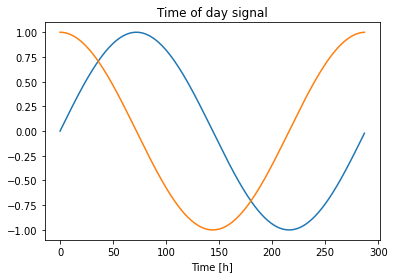

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.array(df_2020['Day sin'])[:288])
plt.plot(np.array(df_2020['Day cos'])[:288])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of Year signal')

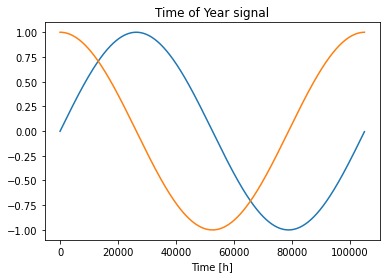

In [ ]:
plt.plot(np.array(df_2020['Year sin'])[:288*365])
plt.plot(np.array(df_2020['Year cos'])[:288*365])
plt.xlabel('Time [h]')
plt.title('Time of Year signal')

In [ ]:
df_2020

,temperature,precipitation,wind_speed,humidity,insolation,snow_load,sunlight,datetime,Day sin,Day cos,Year sin,Year cos
0,2.400000,0.0,3.700,63.0,0.0,0.0,0.0,2020-01-01 00:00:00,-7.670342e-12,1.000000,-0.002150,0.999998
1,2.416667,0.0,3.575,63.0,0.0,0.0,0.0,2020-01-01 00:05:00,2.181489e-02,0.999762,-0.002091,0.999998
2,2.433333,0.0,3.450,63.0,0.0,0.0,0.0,2020-01-01 00:10:00,4.361939e-02,0.999048,-0.002031,0.999998
3,2.450000,0.0,3.325,63.0,0.0,0.0,0.0,2020-01-01 00:15:00,6.540313e-02,0.997859,-0.001971,0.999998
4,2.466667,0.0,3.200,63.0,0.0,0.0,0.0,2020-01-01 00:20:00,8.715574e-02,0.996195,-0.001911,0.999998
...,...,...,...,...,...,...,...,...,...,...,...,...
105403,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:35:00,-1.088669e-01,0.994056,0.010582,0.999944
105404,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:40:00,-8.715574e-02,0.996195,0.010642,0.999943
105405,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:45:00,-6.540313e-02,0.997859,0.010701,0.999943
105406,4.300000,0.0,5.900,54.0,0.0,0.0,0.0,2020-12-31 23:50:00,-4.361939e-02,0.999048,0.010761,0.999942


In [ ]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   날짜      105120 non-null  object 
 1   시간      105120 non-null  object 
 2   기온      105120 non-null  float64
 3   강수량     105120 non-null  float64
 4   풍속      105120 non-null  float64
 5   습도      105120 non-null  float64
 6   일사      105120 non-null  float64
 7   일조      105120 non-null  float64
 8   적설량     105120 non-null  float64
 9   태양광합계   105120 non-null  float64
dtypes: float64(8), object(2)
memory usage: 8.0+ MB


Text(0.5, 1.0, 'Time of Year signal')

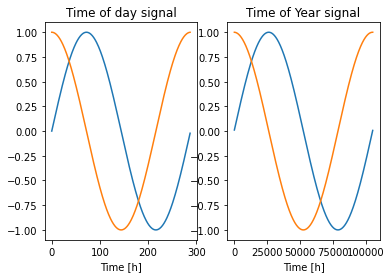

In [ ]:
df_2021.columns = ['date', 'time', 'temperature', 'precipitation', 'wind_speed', 'humidity', 'insolation', 'sunshine', 'snow_load', 'sunlight']
df_2021 = df_2021.drop(['sunshine'], axis = 1)
df_2021['datetime'] = df_2021['date'] + ' ' + df_2021['time']
df_2021.drop(['date', 'time'], axis = 1, inplace = True)
df_2021['datetime'] = pd.to_datetime(df_2021['datetime'])
date_time = pd.to_datetime(df_2021['datetime'])
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

df_2021['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_2021['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_2021['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_2021['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.subplot(1,2,1)
plt.plot(np.array(df_2021['Day sin'])[:288])
plt.plot(np.array(df_2021['Day cos'])[:288])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

plt.subplot(1,2,2)
plt.plot(np.array(df_2021['Year sin'])[:288*365])
plt.plot(np.array(df_2021['Year cos'])[:288*365])
plt.xlabel('Time [h]')
plt.title('Time of Year signal')

In [ ]:
df_2021

,temperature,precipitation,wind_speed,humidity,insolation,snow_load,sunlight,datetime,Day sin,Day cos,Year sin,Year cos
0,4.500000,0.0,6.100000,53.000000,0.0,0.0,0.0,2021-01-01 00:00:00,-6.012051e-12,1.000000,0.010881,0.999941
1,4.483333,0.0,6.058333,53.416667,0.0,0.0,0.0,2021-01-01 00:05:00,2.181489e-02,0.999762,0.010940,0.999940
2,4.466667,0.0,6.016667,53.833333,0.0,0.0,0.0,2021-01-01 00:10:00,4.361939e-02,0.999048,0.011000,0.999939
3,4.450000,0.0,5.975000,54.250000,0.0,0.0,0.0,2021-01-01 00:15:00,6.540313e-02,0.997859,0.011060,0.999939
4,4.433333,0.0,5.933333,54.666667,0.0,0.0,0.0,2021-01-01 00:20:00,8.715574e-02,0.996195,0.011119,0.999938
...,...,...,...,...,...,...,...,...,...,...,...,...
105115,3.600000,0.0,4.400000,64.000000,0.0,0.0,0.0,2021-12-31 23:35:00,-1.088669e-01,0.994056,0.006410,0.999979
105116,3.600000,0.0,4.400000,64.000000,0.0,0.0,0.0,2021-12-31 23:40:00,-8.715574e-02,0.996195,0.006470,0.999979
105117,3.600000,0.0,4.400000,64.000000,0.0,0.0,0.0,2021-12-31 23:45:00,-6.540313e-02,0.997859,0.006530,0.999979
105118,3.600000,0.0,4.400000,64.000000,0.0,0.0,0.0,2021-12-31 23:50:00,-4.361939e-02,0.999048,0.006590,0.999978


In [ ]:
df_2021.to_csv('df_2021.csv')